In [903]:
import requests
import json
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from collections import Counter
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
from datetime import datetime
import seaborn as sns
import string

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

#### Here is the workflow for scraping different parts of the reddit website to figure out the general sentiment around artificial intelligence

## <span style='color:Blue; background-color:Yellow;'> 1.) Workflow: Search for "artifical intelligence", searching for ***posts***, sort by ***newest***, using selenium </span>

In [683]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=386bfe8d-cafa-4df6-af02-ad551526afeb&sort=new"
response = requests.get(url)
response.status_code 

200

In [ ]:
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    print(tag.get_text())

In [929]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=386bfe8d-cafa-4df6-af02-ad551526afeb&sort=new"

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")

# Extracting the titles of threads 
tag_list_1 = []
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    tag_list_1.append(tag.get_text())


In [930]:
# This will just grab the titles and cut off the useless reddit threads at the end
newest_post_titles = tag_list_1[:246]

In [ ]:
newest_post_titles

In [931]:
# Combine all text into a single string
all_text = ' '.join(newest_post_titles)

# Remove punctuation and convert to lowercase
translator = str.maketrans("", "", string.punctuation)
cleaned_text = all_text.translate(translator).lower()

# Tokenize the cleaned text
tokens = cleaned_text.split()

# Count the occurrences of each word
word_counts = Counter(tokens)

# Print or use word_counts as needed
#print(word_counts)

In [932]:
newest_post_titles_word_counts_dict_final = dict(word_counts) 
sorted_newest_post_titles_word_counts_dict = sorted(newest_post_titles_word_counts_dict_final.items(), key=lambda x: x[1], reverse=True)

In [933]:
len(newest_post_titles_word_counts_dict_final)

1038

## Exporting it to a csv

In [ ]:
csv_file_path = 'dict_1_newest_post_titles.csv'

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

    # Write header
    csv_writer.writerow(['Key', 'Value'])

    # Write data
    for key, value in newest_post_titles_word_counts_dict_final.items():
        csv_writer.writerow([key, value])

In [ ]:
with open('testing', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.writer(f)
    w.writerows(newest_post_titles_word_counts_dict_final.items())

### Final: sorted dictionary and not sorted dictionary

In [ ]:
sorted_newest_post_titles_word_counts_dict
#newest_post_titles_word_counts_dict_final

## <span style='color:Red; background-color:White;'>2.) Workflow: Search for "artifical intelligence", searching for ***comment***, sort by ***newest***, using selenium </span>

In [688]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=comment&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=b84e0b3c-e204-44fd-b755-a09ef613f8c6&sort=new"
response = requests.get(url)
response.status_code 

200

In [ ]:
base_xpath = '#search-comment-t1_kaejgwq-post-rtjson-content blockquote:nth-of-type({}) p'

for i in range(1, 4): 
    xpath_expression = f"{base_xpath.format(i)}"
    expressions = soup.select_one(xpath_expression)
    text_content = expressions.get_text(strip=True)
    print(text_content)

soup.select_one('#search-comment-t1_kaejgwq-post-rtjson-content p:nth-of-type(2)').get_text(strip=True)

In [ ]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=comment&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=b84e0b3c-e204-44fd-b755-a09ef613f8c6&sort=new"

# Using the Safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content
for i in range(10):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)


# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

tag_list_2 = []
# Iterating through comments dynamically
for i in range(0, 295):
    content = soup.find("span", id=f"comment-content-{i}")
    if content:
        # Check if the element contains a link
        if content.find("a"):
            # Skip this iteration entirely
            continue
        tag_list_2.append(content.get_text())
    else:
        print(" ")

In [690]:
text_list = [tag.replace('\n', ' ').strip() for tag in tag_list_2 if tag.strip()]
text_list
# Convert the sorted result to a dictionary
newest_post_titles_word_counts_dict_final = dict(newest_post_titles_word_counts_dict)

# And here is it sorted from highest to lowest
sorted_newest_post_titles_word_counts_dict = sorted(newest_post_titles_word_counts_dict.items(), key=lambda x: x[1], reverse=True)

In [ ]:
lowercase_text_list = []

# Iterate through each title in the list
for text in text_list:
    words = text.split()
    lowercase_text_list.append([word.lower() for word in words])

# Flattening the list of lists into a single list of words
flattened_words = [word for sublist in lowercase_text_list for word in sublist]

# Using Counter to get the count of each distinct word
flattened_word_counts = Counter(flattened_words)
# Final dictionary containing the count of each word in  Search for "artifical intelligence", searching for comments, sort by newest
newest_post_comments_word_counts_dict = dict(flattened_word_counts)

for word, count in newest_post_comments_word_counts_dict.items():
    print(f"{word}: {count}")


In [692]:
# Convert the sorted result to a dictionary
newest_post_comments_word_counts_dict = dict(flattened_word_counts)

# And here is it sorted from highest to lowest
sorted_newest_comment_titles_word_counts_dict = sorted(newest_post_comments_word_counts_dict.items(), key=lambda x: x[1], reverse=True)

### Final: sorted dictionary and not sorted dictionary

In [ ]:
sorted_newest_comment_titles_word_counts_dict
#newest_post_comments_word_counts_dict

## <span style='color:Blue; background-color:Yellow;'> 3.) Workflow: Search for "artifical intelligence", searching for ***post***, sort by ***most comments***, using selenium </span>

In [693]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=1e881230-3c5d-4f22-b9ec-f7caa041cc7c&sort=comments"
response = requests.get(url)
response.status_code 

200

In [ ]:
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    print(tag.get_text())

In [694]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=1e881230-3c5d-4f22-b9ec-f7caa041cc7c&sort=comments"

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")

# Extracting the titles of threads 
tag_list_3 = []
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    tag_list_3.append(tag.get_text())

In [695]:
# This will just grab the titles and cut off the useless reddit threads at the end
newest_post_titles_3 = tag_list_3[:243]

In [ ]:
newest_post_titles_3

In [ ]:
lowercase_words_newest_post_titles_3 = []

# Iterate through each title in the list
for title in newest_post_titles_3:
    words = title.split()
    lowercase_words_newest_post_titles_3.append([word.lower() for word in words])

#print(lowercase_words_newest_post_titles)


# Flattening the list of lists into a single list of words
flat_words = [word for sublist in lowercase_words_newest_post_titles_3 for word in sublist]

# Using Counter to get the count of each distinct word
word_counts = Counter(flat_words)
# Final dictionary containing the count of each word in  Search for "artifical intelligence", searching for posts, sort by newest
newest_post_titles_3_word_counts_dict = dict(word_counts)
for word, count in newest_post_titles_3_word_counts_dict.items():
    print(f"{word}: {count}")
# newest_post_titles_word_counts_dict is the name of the final dict

# Convert the sorted result to a dictionary
most_comments_post_titles_word_counts_dict_final = dict(newest_post_titles_3_word_counts_dict)

# And here is it sorted from highest to lowest
sorted_newest_post_titles_word_counts_dict = sorted(most_comments_post_titles_word_counts_dict_final.items(), key=lambda x: x[1], reverse=True)

### Final: sorted dictionary and not sorted dictionary

In [ ]:
sorted_newest_post_titles_word_counts_dict
# most_comments_post_titles_word_counts_dict_final

## <span style='color:Red; background-color:White;'> 4.) Workflow: Search for "artifical intelligence", searching for ***comment***, sort by ***relevance***, using selenium </span>

In [697]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=comment&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=44a60ee4-76ac-47e0-8051-a495f3c21a93&sort=relevance"
response = requests.get(url)
response.status_code 

200

In [ ]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=comment&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=44a60ee4-76ac-47e0-8051-a495f3c21a93&sort=relevance"

# Using the Safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content
for i in range(10):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)


# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

tag_list_4 = []
# Iterating through comments dynamically
for i in range(0, 295):
    content = soup.find("span", id=f"comment-content-{i}")
    if content:
        # Check if the element contains a link
        if content.find("a"):
            # Skip this iteration entirely
            continue
        tag_list_4.append(content.get_text())
    else:
        print(" ")

In [ ]:
text_list = [tag.replace('\n', ' ').strip() for tag in tag_list_4 if tag.strip()]
text_list

In [ ]:
lowercase_text_list_4 = []

# Iterate through each title in the list
for text in text_list:
    words = text.split()
    lowercase_text_list_4.append([word.lower() for word in words])

# Flattening the list of lists into a single list of words
flattened_words = [word for sublist in lowercase_text_list_4 for word in sublist]

# Using Counter to get the count of each distinct word
flattened_word_counts = Counter(flattened_words)
# Final dictionary containing the count of each word in  Search for "artifical intelligence", searching for comments, sort by newest
relevance_post_comments_word_counts_dict = dict(flattened_word_counts)

for word, count in relevance_post_comments_word_counts_dict.items():
    print(f"{word}: {count}")

In [701]:
# Convert the sorted result to a dictionary
relevance_post_comments_word_counts_dict_final = dict(relevance_post_comments_word_counts_dict)

# And here is it sorted from highest to lowest
sorted_relevance_post_comments_word_counts_dict_final = sorted(relevance_post_comments_word_counts_dict_final.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_relevance_post_comments_word_counts_dict_final
# relevance_post_comments_word_counts_dict_final

## <span style='color:Red; background-color:White;'> 5.) Workflow: Search for "artifical intelligence", searching for ***comments***, sort by ***TOP***, using selenium </span>

In [702]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=comment&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=e0e3857f-f489-4088-960e-04f77053f59e&sort=top"
response = requests.get(url)
response.status_code 

200

In [ ]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=comment&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=e0e3857f-f489-4088-960e-04f77053f59e&sort=top"

# Using the Safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content
for i in range(10):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)


# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

tag_list_5 = []
# Iterating through comments dynamically
for i in range(0, 200):
    content = soup.find("span", id=f"comment-content-{i}")
    if content:
        # Check if the element contains a link
        if content.find("a"):
            # Skip this iteration entirely
            continue
        tag_list_5.append(content.get_text())
    else:
        print(" ")

In [ ]:
text_list = [tag.replace('\n', ' ').strip() for tag in tag_list_5 if tag.strip()]
text_list

In [ ]:
lowercase_text_list_5 = []

# Iterate through each title in the list
for text in text_list:
    words = text.split()
    lowercase_text_list_5.append([word.lower() for word in words])

# Flattening the list of lists into a single list of words
flattened_words = [word for sublist in lowercase_text_list_5 for word in sublist]

# Using Counter to get the count of each distinct word
flattened_word_counts = Counter(flattened_words)
# Final dictionary containing the count of each word in  Search for "artifical intelligence", searching for comments, sort by newest
top_comments_word_counts_dict = dict(flattened_word_counts)

for word, count in top_comments_word_counts_dict.items():
    print(f"{word}: {count}")

In [706]:
# Convert the sorted result to a dictionary
top_comments_word_counts_dict_final = dict(top_comments_word_counts_dict)

# And here is it sorted from highest to lowest
sorted_top_comments_word_counts_dict_final = sorted(top_comments_word_counts_dict_final.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_top_comments_word_counts_dict_final
# top_comments_word_counts_dict_final

## <span style='color:Blue; background-color:Yellow;'> 6.) Workflow: Search for "artifical intelligence", searching for ***posts***, sort by ***TOP***, using selenium </span>

In [707]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=a067c5d1-726a-4799-b2eb-ab5b44e4b6f5&sort=top"
response = requests.get(url)
response.status_code 

200

In [ ]:
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    print(tag.get_text())

In [708]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=a067c5d1-726a-4799-b2eb-ab5b44e4b6f5&sort=top"

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")

# Extracting the titles of threads 
tag_list_6 = []
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    tag_list_6.append(tag.get_text())

In [709]:
newest_post_titles_6 = tag_list_6[:247]

In [ ]:
newest_post_titles_6

In [ ]:
lowercase_words_newest_post_titles_6 = []

# Iterate through each title in the list
for title in newest_post_titles_6:
    words = title.split()
    lowercase_words_newest_post_titles_6.append([word.lower() for word in words])

#print(lowercase_words_newest_post_titles)


# Flattening the list of lists into a single list of words
flat_words = [word for sublist in lowercase_words_newest_post_titles_6 for word in sublist]

# Using Counter to get the count of each distinct word
word_counts = Counter(flat_words)
# Final dictionary containing the count of each word in  Search for "artifical intelligence", searching for posts, sort by newest
top_post_titles = dict(word_counts)
for word, count in top_post_titles.items():
    print(f"{word}: {count}")
# newest_post_titles_word_counts_dict is the name of the final dict

# Convert the sorted result to a dictionary
top_post_titles_dict_final = dict(top_post_titles)

# And here is it sorted from highest to lowest
sorted_top_post_titles_dict_final = sorted(top_post_titles_dict_final.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_top_post_titles_dict_final
# top_post_titles_dict_final

## <span style='color:Blue; background-color:Yellow;'> 7.) Workflow: Search for "artificial intelligence", searching for ***posts***, sort by ***HOT***, using selenium </span>

In [711]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=f5c7c150-40e2-4794-a147-6132abe91bd0&sort=hot"
response = requests.get(url)
response.status_code 

200

In [ ]:
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    print(tag.get_text())

In [712]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=f5c7c150-40e2-4794-a147-6132abe91bd0&sort=hot"

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")

# Extracting the titles of threads 
tag_list_7 = []
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    tag_list_7.append(tag.get_text())

In [713]:
newest_post_titles_7 = tag_list_7[:246]

In [ ]:
lowercase_words_newest_post_titles_7 = []

# Iterate through each title in the list
for title in newest_post_titles_7:
    words = title.split()
    lowercase_words_newest_post_titles_7.append([word.lower() for word in words])

#print(lowercase_words_newest_post_titles)


# Flattening the list of lists into a single list of words
flat_words = [word for sublist in lowercase_words_newest_post_titles_7 for word in sublist]

# Using Counter to get the count of each distinct word
word_counts = Counter(flat_words)
# Final dictionary containing the count of each word in  Search for "artifical intelligence", searching for posts, sort by newest
hot_post_titles = dict(word_counts)
for word, count in hot_post_titles.items():
    print(f"{word}: {count}")
# newest_post_titles_word_counts_dict is the name of the final dict

# Convert the sorted result to a dictionary
hot_post_titles_dict_final = dict(hot_post_titles)

# And here is it sorted from highest to lowest
sorted_hot_post_title_dict_final = sorted(hot_post_titles_dict_final.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_hot_post_title_dict_final
# hot_post_title_dict_final

relevance, hot, top, new, most comments

## <span style='color:Blue; background-color:Orange;'> 8.) Workflow: Search for "artificial intelligence", searching for ***posts***, sort by ***HOT***, within the ***past year*** using selenium </span>

In [715]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=f4eb9063-ba8d-416b-970f-8c7834152541&t=year&sort=top"
response = requests.get(url)
response.status_code

200

In [ ]:
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    print(tag.get_text())

In [716]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=f4eb9063-ba8d-416b-970f-8c7834152541&t=year&sort=top"

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")

# Extracting the titles of threads 
tag_list_8 = []
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    tag_list_8.append(tag.get_text())

In [717]:
newest_post_titles_8 = tag_list_8[:246]

In [ ]:
lowercase_words_newest_post_titles_8 = []

# Iterate through each title in the list
for title in newest_post_titles_8:
    words = title.split()
    lowercase_words_newest_post_titles_8.append([word.lower() for word in words])

#print(lowercase_words_newest_post_titles)


# Flattening the list of lists into a single list of words
flat_words = [word for sublist in lowercase_words_newest_post_titles_8 for word in sublist]

# Using Counter to get the count of each distinct word
word_counts = Counter(flat_words)
# Final dictionary containing the count of each word in  Search for "artifical intelligence", searching for posts, sort by newest
hot_post_past_year_titles = dict(word_counts)
for word, count in hot_post_past_year_titles.items():
    print(f"{word}: {count}")
# newest_post_titles_word_counts_dict is the name of the final dict

# Convert the sorted result to a dictionary
hot_post_past_year_titles_dict_final = dict(hot_post_past_year_titles)

# And here is it sorted from highest to lowest
sorted_hot_post_past_year_titles_dict_final = sorted(hot_post_past_year_titles_dict_final.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_hot_post_past_year_titles_dict_final
# hot_post_past_year_titles_dict_final

## <span style='color:Blue; background-color:Orange;'> 9.) Workflow: Search for "artificial intelligence", searching for ***posts***, sort by ***Relevance***, within the ***past year*** using selenium </span>

In [ ]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=90a75a27-d6fb-4f06-9899-4a3da653f393&t=year&sort=relevance"
response = requests.get(url)
response.status_code

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")

# Extracting the titles of threads 
tag_list_9 = []
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    tag_list_9.append(tag.get_text())
    
newest_post_titles_9 = tag_list_9[:246]

lowercase_words_newest_post_titles_9 = []

# Iterate through each title in the list
for title in newest_post_titles_9:
    words = title.split()
    lowercase_words_newest_post_titles_9.append([word.lower() for word in words])

#print(lowercase_words_newest_post_titles)


# Flattening the list of lists into a single list of words
flat_words = [word for sublist in lowercase_words_newest_post_titles_9 for word in sublist]

# Using Counter to get the count of each distinct word
word_counts = Counter(flat_words)
# Final dictionary containing the count of each word in  Search for "artifical intelligence", searching for posts, sort by newest
relevance_post_past_year_titles = dict(word_counts)
for word, count in relevance_post_past_year_titles.items():
    print(f"{word}: {count}")
# newest_post_titles_word_counts_dict is the name of the final dict

# Convert the sorted result to a dictionary
relevance_post_past_year_titles_dict_final = dict(relevance_post_past_year_titles)

# And here is it sorted from highest to lowest
sorted_relevance_post_past_year_titles_dict_final = sorted(relevance_post_past_year_titles_dict_final.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_relevance_post_past_year_titles_dict_final
# relevance_post_past_year_titles_dict_final

## <span style='color:Blue; background-color:Orange;'> 10.) Workflow: Search for "artificial intelligence", searching for ***posts***, sort by ***Most Comments***, within the ***past year*** using selenium </span>

In [ ]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=09ea418e-5aa8-4a99-8a28-950362ff385e&t=year&sort=comments"
response = requests.get(url)
response.status_code

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")

# Extracting the titles of threads 
tag_list_10 = []
invisible_tags = soup.find_all("span", class_="invisible")
for tag in invisible_tags:
    tag_list_10.append(tag.get_text())
    
newest_post_titles_10 = tag_list_10[:246]

lowercase_words_newest_post_titles_10 = []

# Iterate through each title in the list
for title in newest_post_titles_10:
    words = title.split()
    lowercase_words_newest_post_titles_10.append([word.lower() for word in words])

#print(lowercase_words_newest_post_titles)


# Flattening the list of lists into a single list of words
flat_words = [word for sublist in lowercase_words_newest_post_titles_10 for word in sublist]

# Using Counter to get the count of each distinct word
word_counts = Counter(flat_words)
# Final dictionary containing the count of each word in  Search for "artifical intelligence", searching for posts, sort by newest
most_comments_post_past_year_titles = dict(word_counts)
for word, count in most_comments_post_past_year_titles.items():
    print(f"{word}: {count}")
# newest_post_titles_word_counts_dict is the name of the final dict

# Convert the sorted result to a dictionary
most_comments_post_past_year_titles_dict_final = dict(most_comments_post_past_year_titles)

# And here is it sorted from highest to lowest
sorted_most_comments_post_past_year_titles_dict_final = sorted(most_comments_post_past_year_titles_dict_final.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_most_comments_post_past_year_titles_dict_final
# most_comments_post_past_year_titles_dict_final

## <span style='color:Yellow; background-color:Green;'> 11.) Workflow: Search for "artificial intelligence", searching for ***posts***, sort by ***TOP***, ***all time***, and gathering the date posted, and amount of interactions using selenium </span>

In [721]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=a68725fb-6ca9-4487-bd00-7b02cc9f1e3a&t=all&sort=top"
response = requests.get(url)
response.status_code 

200

In [722]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=45be8084-75f1-429d-bb14-0d47161d63b1&t=all&sort=top"

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")
final_top_date_time_vote_comment_dict = []
invisible_tags = soup.find_all("time")
invisible_tags_titles = soup.find_all("span", class_="invisible")
vote_comment_divs = soup.find_all('div', class_='text-neutral-content-weak text-12')
name_tags = soup.find_all("a", class_= "flex items-center text-neutral-content-weak font-semibold")

# Iterate over both lists simultaneously using zip
for time_tag, title_tag, div, name_tag in zip(invisible_tags, invisible_tags_titles, vote_comment_divs, name_tags):
    # Extract date information from the <time> tag
    date_value = time_tag['title']
    # Extract post title from the <span> tag
    title = title_tag.get_text(strip=True)

    # Extract votes
    votes_tag = div.find('faceplate-number', {'pretty': ''})
    votes = votes_tag['number']

    # Extract comments
    comments_tag = div.find('span', string='comments')
    comments = comments_tag.find_previous('faceplate-number')['number']
    subreddit = name_tag["href"]
    # Print both date, title, votes, and comments
    #print(f"Date: {date_value}, Title: {title}, Votes = {votes}, Comments = {comments}, Subreddit= {subreddit}")
    final_top_date_time_vote_comment_dict.append({
        "Title": title,
        "Subreddit": subreddit,
        "Date": date_value,
        "Votes": int(votes),
        "Comments": int(comments),  
    })

In [723]:
len(final_top_date_time_vote_comment_dict)

247

## <span style='color:Yellow; background-color:Green;'> 12.) Workflow: Search for "artificial intelligence", searching for ***posts***, sort by ***most comments***, ***all time***, and gathering the date posted, and amount of interactions using selenium </span>

In [724]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=fc7a51aa-31c1-4df4-8e8d-f632f66fcbb3&t=all&sort=comments"
response = requests.get(url)
response.status_code 

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")
final_most_coments_date_time_vote_comment_dict = []
invisible_tags = soup.find_all("time")
invisible_tags_titles = soup.find_all("span", class_="invisible")
vote_comment_divs = soup.find_all('div', class_='text-neutral-content-weak text-12')
name_tags = soup.find_all("a", class_= "flex items-center text-neutral-content-weak font-semibold")

# Iterate over both lists simultaneously using zip
for time_tag, title_tag, div, name_tag in zip(invisible_tags, invisible_tags_titles, vote_comment_divs, name_tags):
    # Extract date information from the <time> tag
    date_value = time_tag['title']
    # Extract post title from the <span> tag
    title = title_tag.get_text(strip=True)

    # Extract votes
    votes_tag = div.find('faceplate-number', {'pretty': ''})
    votes = votes_tag['number']

    # Extract comments
    comments_tag = div.find('span', string='comments')
    comments = comments_tag.find_previous('faceplate-number')['number']
    subreddit = name_tag["href"]
    # Print both date, title, votes, and comments
    #print(f"Date: {date_value}, Title: {title}, Votes = {votes}, Comments = {comments}, Subreddit= {subreddit}")
    final_most_coments_date_time_vote_comment_dict.append({
        "Title": title,
        "Subreddit": subreddit,
        "Date": date_value,
        "Votes": int(votes),
        "Comments": int(comments),  
    })

In [800]:
len(final_most_coments_date_time_vote_comment_dict)

243

## <span style='color:Yellow; background-color:Green;'> 13.) Workflow: Search for "artificial intelligence", searching for ***posts***, sort by ***Relevance***, ***all time***, and gathering the date posted, and amount of interactions using selenium </span>

In [726]:
url = "https://www.reddit.com/search/?q=artificial+intelligence&type=link&cId=daed8c04-82aa-4737-8bf2-cf9e69e933fc&iId=02b2cbc7-61a7-40dc-952f-34bbb143a748&sort=relevance"
response = requests.get(url)
response.status_code 

# Using the safari driver
driver = webdriver.Safari()

# Opening the URL
driver.get(url)

# Scroll down to load more content, here I went to ten because that is the maximum amount of times it can scroll
for i in range(10):  
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3) #: I will need a longer sleep time if I'm trying to load more titles

# Getting the updated HTML content
html_content = driver.page_source

# Closing the browser
driver.quit()

# Parsing the html content using BS
soup = BeautifulSoup(html_content, "html.parser")
final_relevance_date_time_vote_comment_dict = []
invisible_tags = soup.find_all("time")
invisible_tags_titles = soup.find_all("span", class_="invisible")
vote_comment_divs = soup.find_all('div', class_='text-neutral-content-weak text-12')
name_tags = soup.find_all("a", class_= "flex items-center text-neutral-content-weak font-semibold")

# Iterate over both lists simultaneously using zip
for time_tag, title_tag, div, name_tag in zip(invisible_tags, invisible_tags_titles, vote_comment_divs, name_tags):
    # Extract date information from the <time> tag
    date_value = time_tag['title']
    # Extract post title from the <span> tag
    title = title_tag.get_text(strip=True)

    # Extract votes
    votes_tag = div.find('faceplate-number', {'pretty': ''})
    votes = votes_tag['number']

    # Extract comments
    comments_tag = div.find('span', string='comments')
    if comments_tag:
        # Find the previous 'faceplate-number' tag
        comments_number_tag = comments_tag.find_previous('faceplate-number')
        # Check if the 'comments_number_tag' is not None before accessing its attributes
        if comments_number_tag:
            comments = int(comments_number_tag['number'])
        else:
            comments = -1  # Set a default value, e.g., -1
    else:
        comments = -1  # Set a default value, e.g., -1
    #comments = comments_tag.find_previous('faceplate-number')['number']
    subreddit = name_tag["href"]
    # Print both date, title, votes, and comments
    #print(f"Date: {date_value}, Title: {title}, Votes = {votes}, Comments = {comments}, Subreddit= {subreddit}")
    final_relevance_date_time_vote_comment_dict.append({
        "Title": title,
        "Subreddit": subreddit,
        "Date": date_value,
        "Votes": int(votes),
        "Comments": int(comments),  
    })

In [727]:
len(final_relevance_date_time_vote_comment_dict)

248

## <span style='color:Black; background-color:White;'> 13.) **Dict List** </span>


## first dict

In [908]:
sorted_newest_post_titles_dict_1 = sorted_newest_post_titles_word_counts_dict 
len(newest_post_titles_word_counts_dict_final)

1141

In [899]:
csv_file_path = 'dict_1_sorted_newest_post_titles.csv'

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

    # Write header
    csv_writer.writerow(['Key', 'Value'])

    # Write data
    for key, value in newest_post_titles_word_counts_dict_final.items():
        csv_writer.writerow([key, value])

In [ ]:
sorted_newest_post_titles_dict_1 

In [ ]:
newest_post_titles_word_counts_dict_final

In [ ]:
new = {k: v for (k, v) in newest_post_titles_word_counts_dict_final.items() if v > 1}

In [742]:
new = {(k,v) for (k,v) in sorted_newest_post_titles_dict_1 if v > 2}

In [ ]:
new

In [ ]:
sorted_newest_comment_titles_word_counts_dict
newest_post_comments_word_counts_dict

In [895]:
values_to_keep = [i for i in range(5,500)]

new = {k: v for k, v in newest_post_comments_word_counts_dict.items() if v in values_to_keep}

In [ ]:
new

In [896]:
# Your word frequency dictionary

# List of words to filter out
stop_words = ['artifical','the', 'and', 'it', 'that', 'to', 'for', 'in','so','was',"it's",'at','about', 'is', 'are', 'we', 'i', 'be','of','a','you','as','with','but','an','not','on','or','this','by','they','have']

# Filter out stop words from the word frequency dictionary
filtered_word_frequencies = {word: freq for word, freq in new.items() if word.lower() not in stop_words}

# Display the filtered dictionary
#print(filtered_word_frequencies)


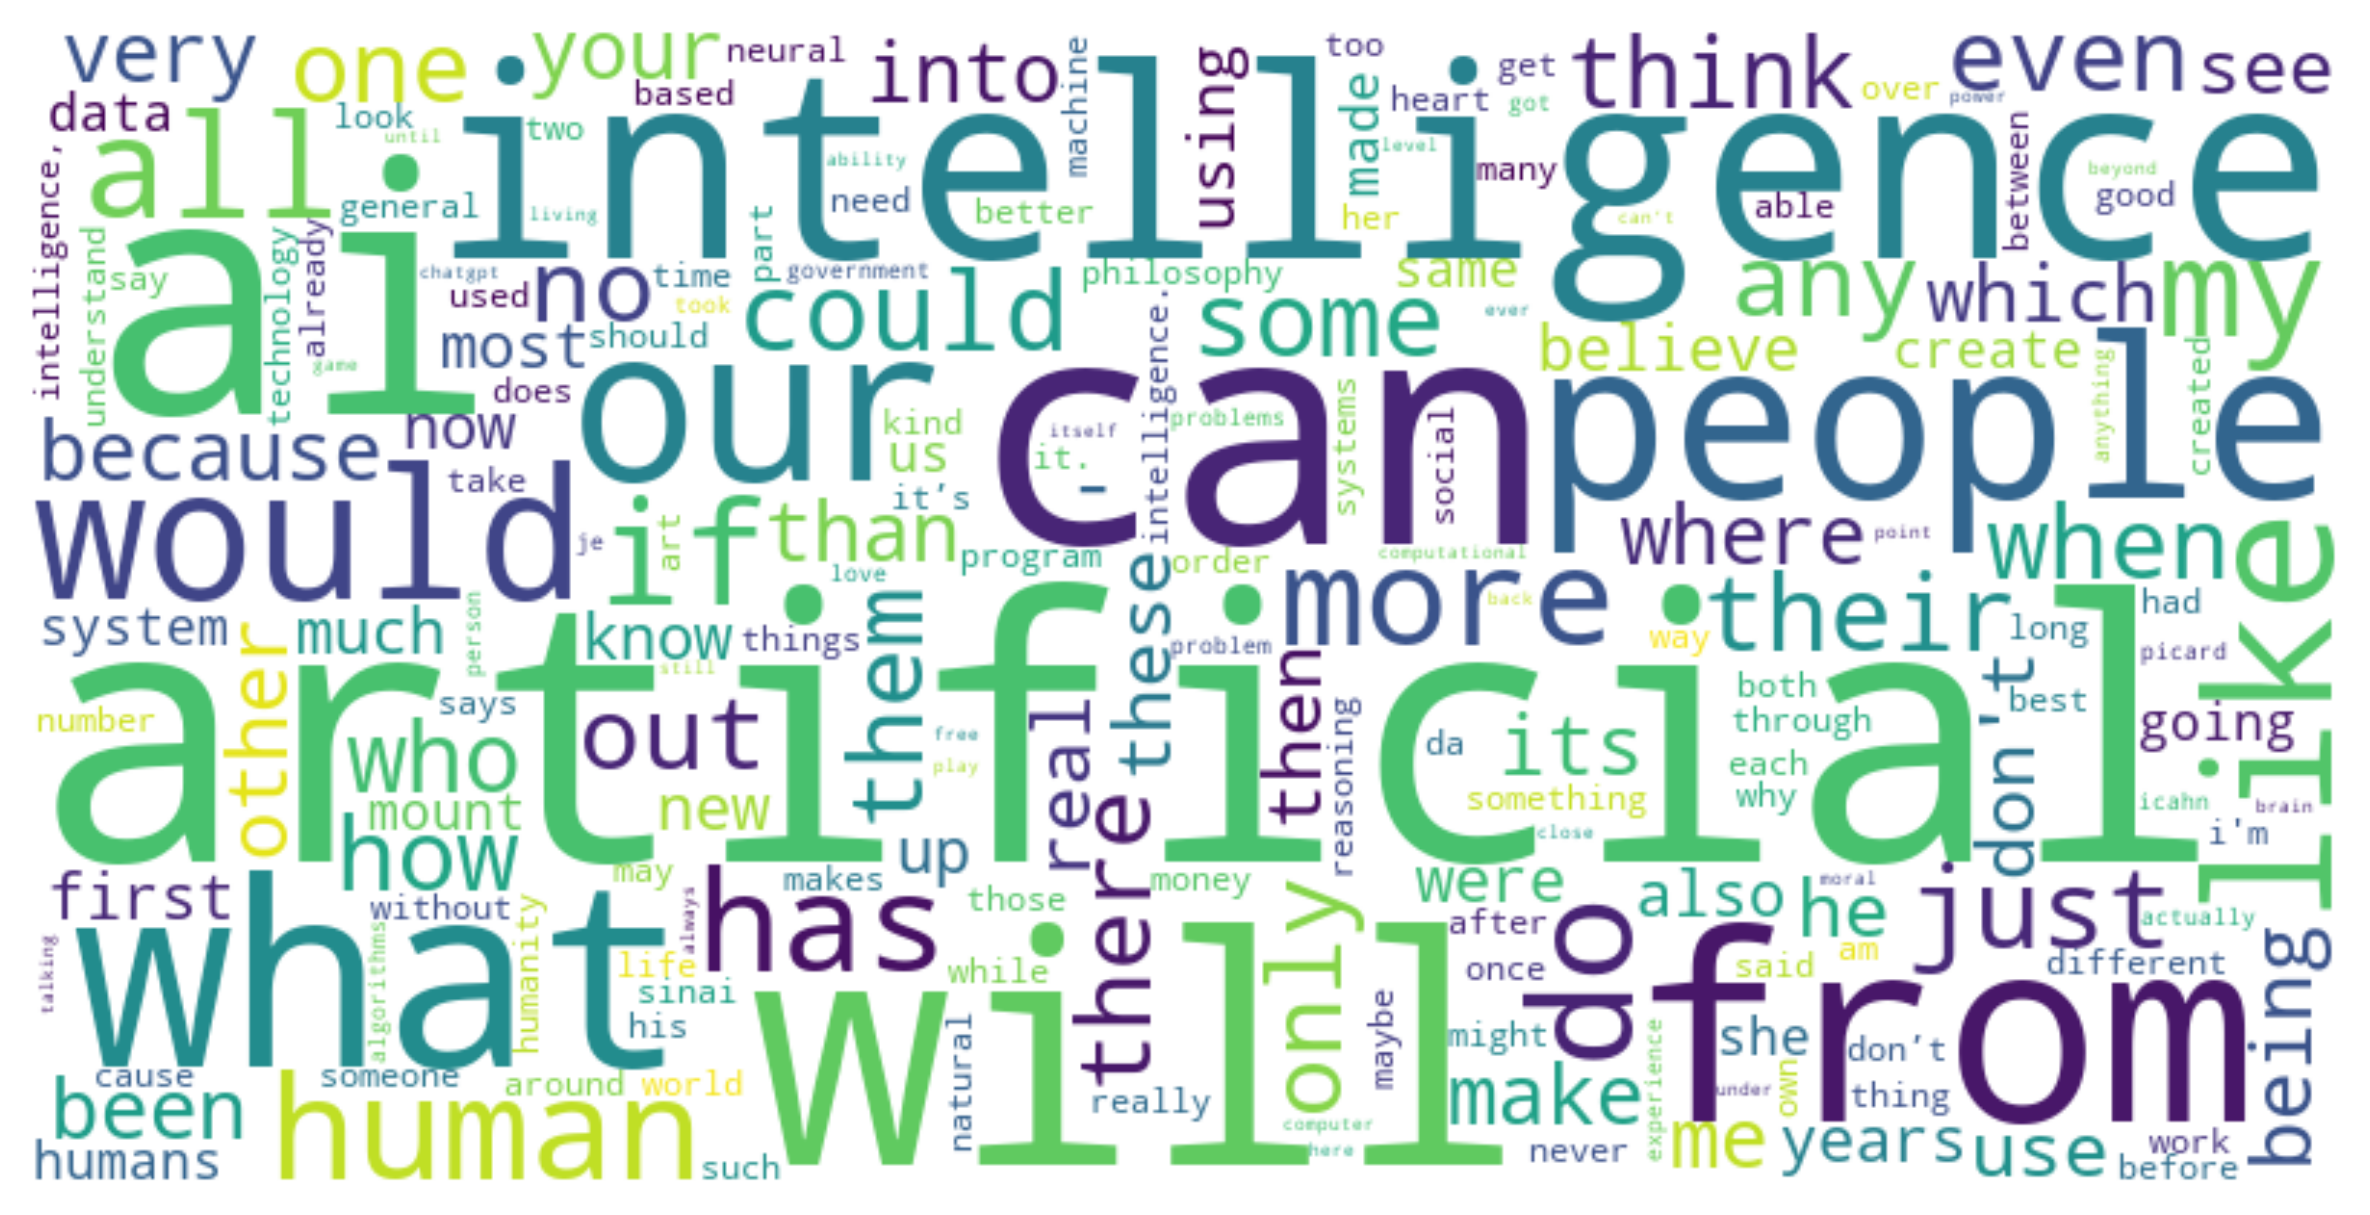

In [897]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(filtered_word_frequencies)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Second Dict

In [ ]:
sorted_newest_post_titles_word_counts_dict
# most_comments_post_titles_word_counts_dict_final

## Third Dict

In [ ]:
sorted_relevance_post_comments_word_counts_dict_final
# relevance_post_comments_word_counts_dict_final

## Fourth Dict

In [ ]:
sorted_top_comments_word_counts_dict_final
# top_comments_word_counts_dict_final

## Fifth Dict

In [ ]:
sorted_top_post_titles_dict_final
# top_post_titles_dict_final

## Sixth Dict

In [ ]:
sorted_hot_post_title_dict_final
# hot_post_title_dict_final

## Seventh Dict

In [ ]:
sorted_hot_post_past_year_titles_dict_final
# hot_post_past_year_titles_dict_final

## Eighth Dict

In [ ]:
sorted_relevance_post_past_year_titles_dict_final
# relevance_post_past_year_titles_dict_final

## Ninth dict

In [ ]:
sorted_most_comments_post_past_year_titles_dict_final
# most_comments_post_past_year_titles_dict_final

In [768]:
len(final_top_date_time_vote_comment_dict)

247

In [769]:
len(final_most_coments_date_time_vote_comment_dict)

243

In [770]:
len(final_relevance_date_time_vote_comment_dict)

248

In [777]:
combined_list = []
combined_list.extend(final_top_date_time_vote_comment_dict)
combined_list.extend(final_most_coments_date_time_vote_comment_dict)
combined_list.extend(final_relevance_date_time_vote_comment_dict)


In [ ]:
combined_list

In [780]:
csv_file_path = 'output.csv'  # Change this to the desired file path

# Write the header and data to the CSV file
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = combined_list[0].keys()  # Assumes all dictionaries have the same keys
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for row in combined_list:
        writer.writerow(row)

print(f"CSV file created at: {csv_file_path}")

CSV file created at: output.csv


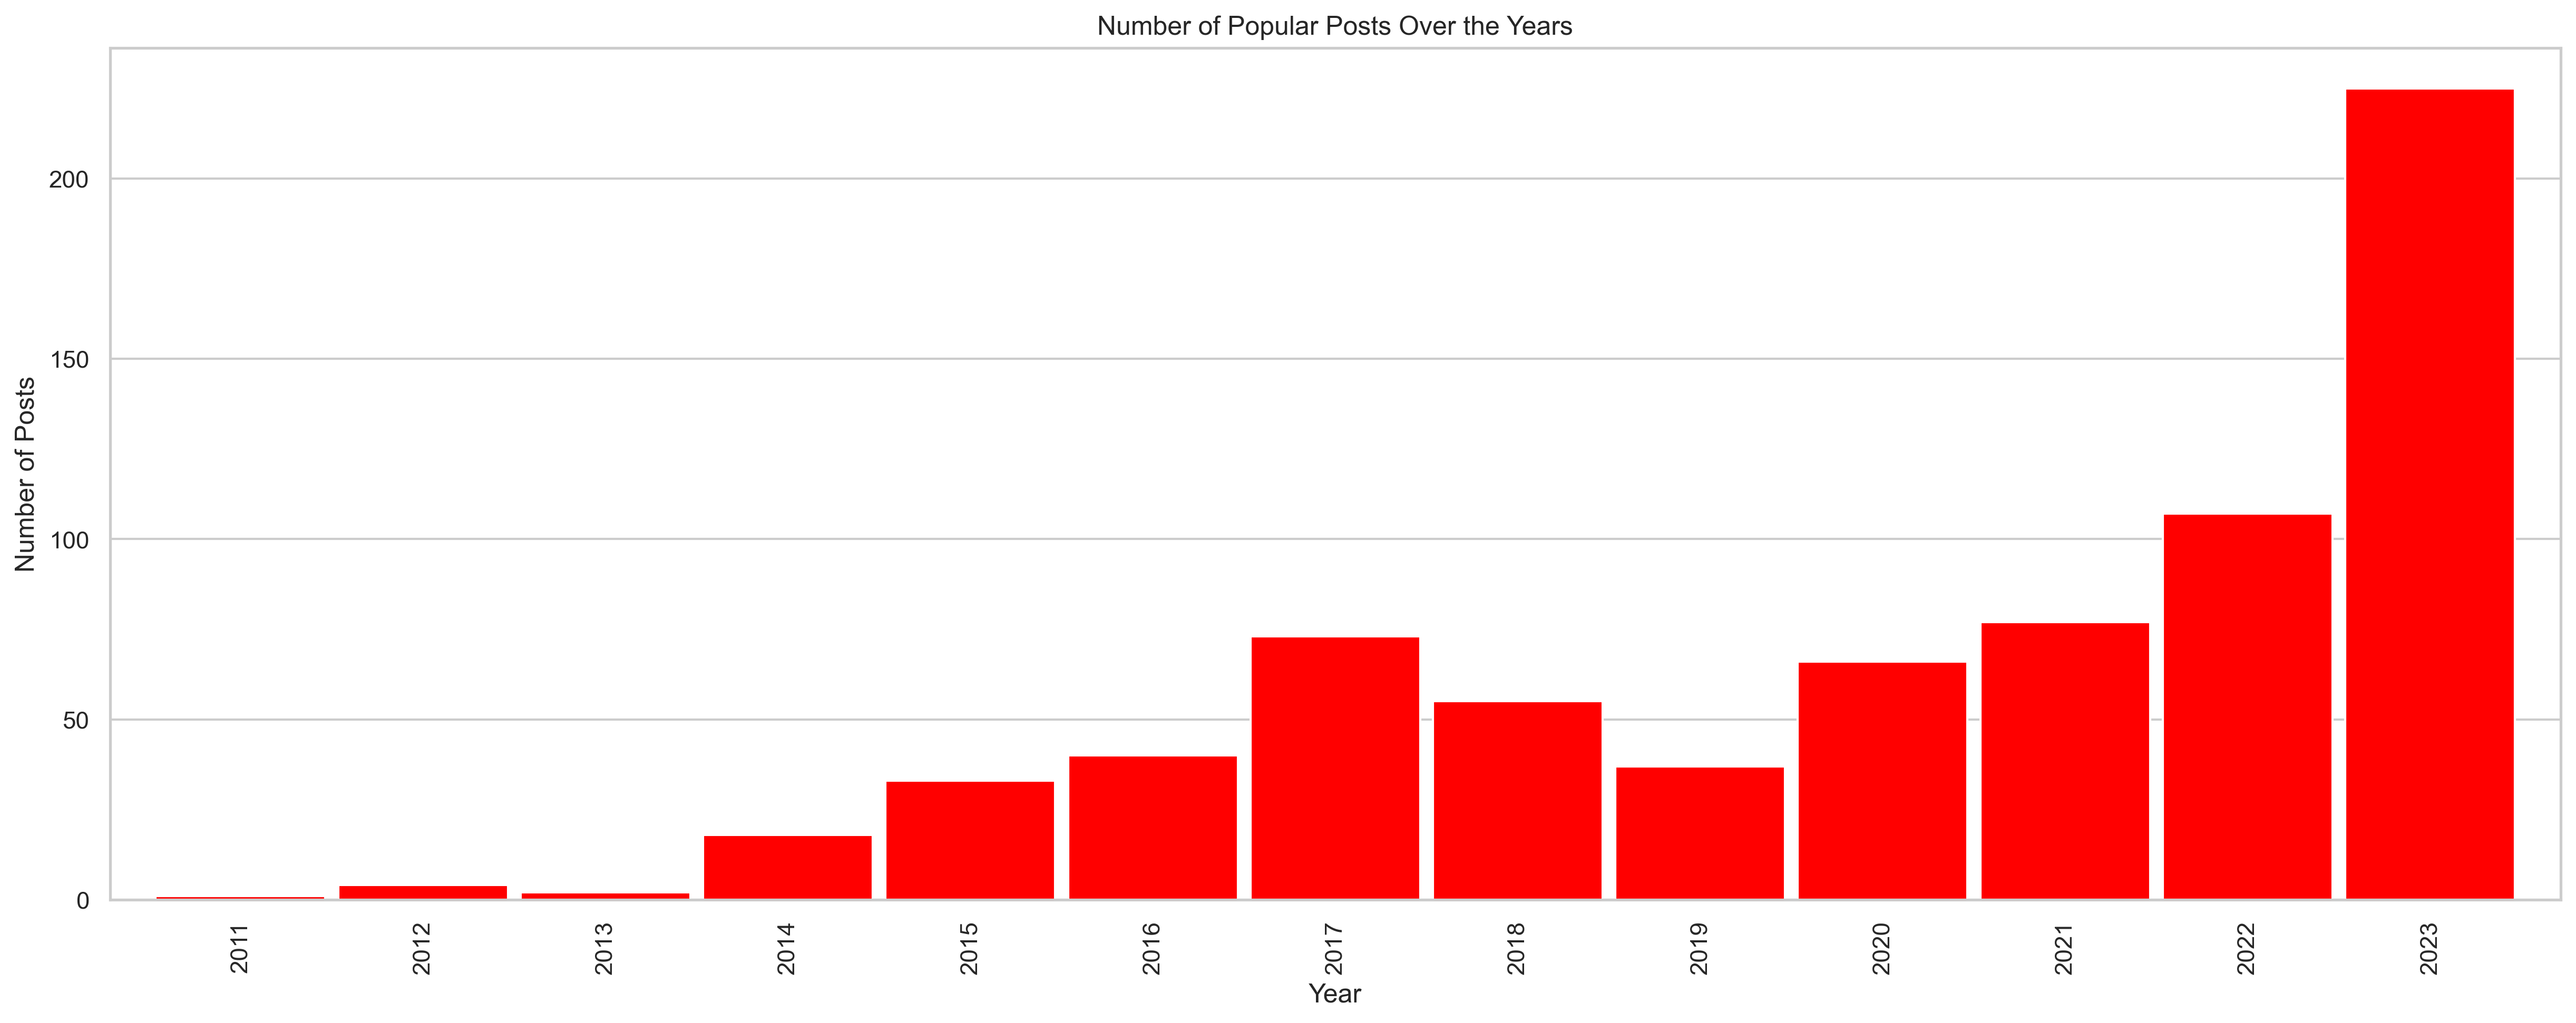

In [868]:
df = pd.read_csv('output.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by year and count the number of posts
posts_per_year = df.groupby('Year').size()

# Plotting
plt.figure(figsize=(20, 7))
posts_per_year.plot(kind='bar', color='red', width=.93)
plt.title('Number of Popular Posts Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
#plt.grid(axis="y")
plt.grid(axis='x')
#plt.grid(axis="y")
plt.show()

## Number of votes over the years

In [790]:
posts_per_year

Year
2011      1
2012      4
2013      2
2014     18
2015     33
2016     40
2017     73
2018     55
2019     37
2020     66
2021     77
2022    107
2023    225
dtype: int64

In [794]:
votes_per_year = df.groupby('Year')['Votes'].sum()

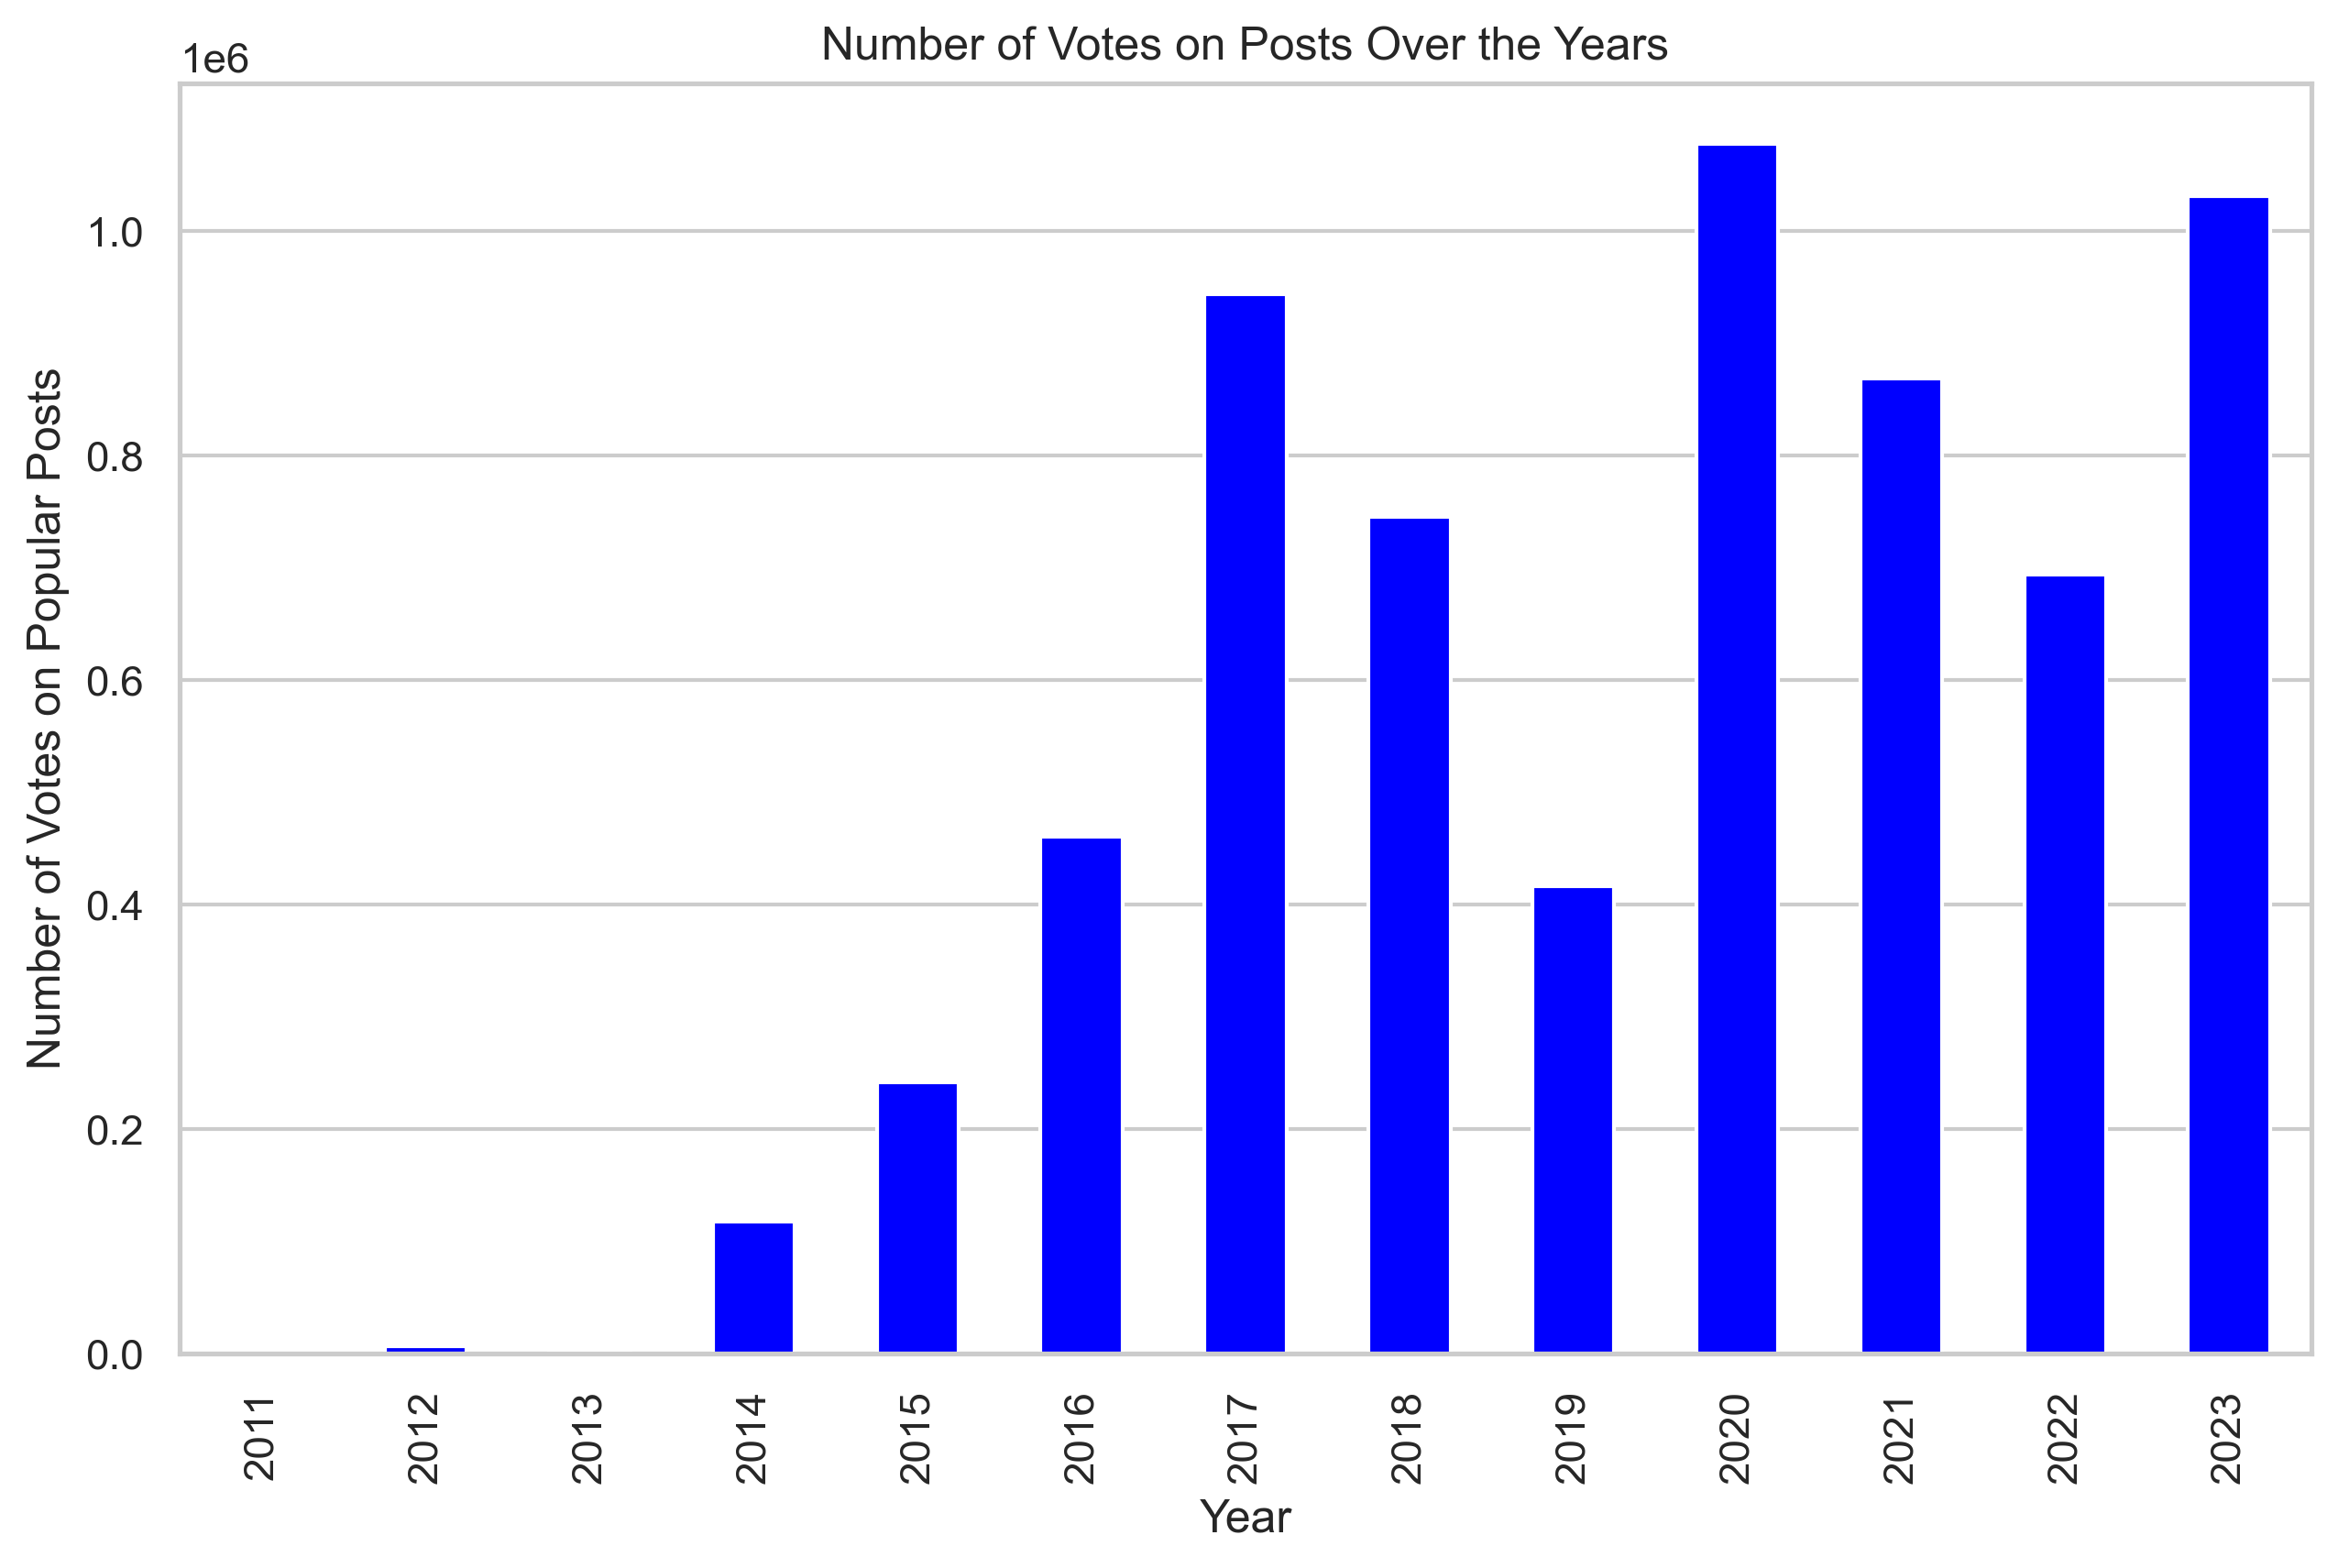

In [850]:
plt.figure(figsize=(10, 6))
votes_per_year.plot(kind='bar', color='Blue')
plt.title('Number of Votes on Posts Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Votes on Popular Posts')
plt.grid(axis='x')
plt.show()

## Number of Comments on posts

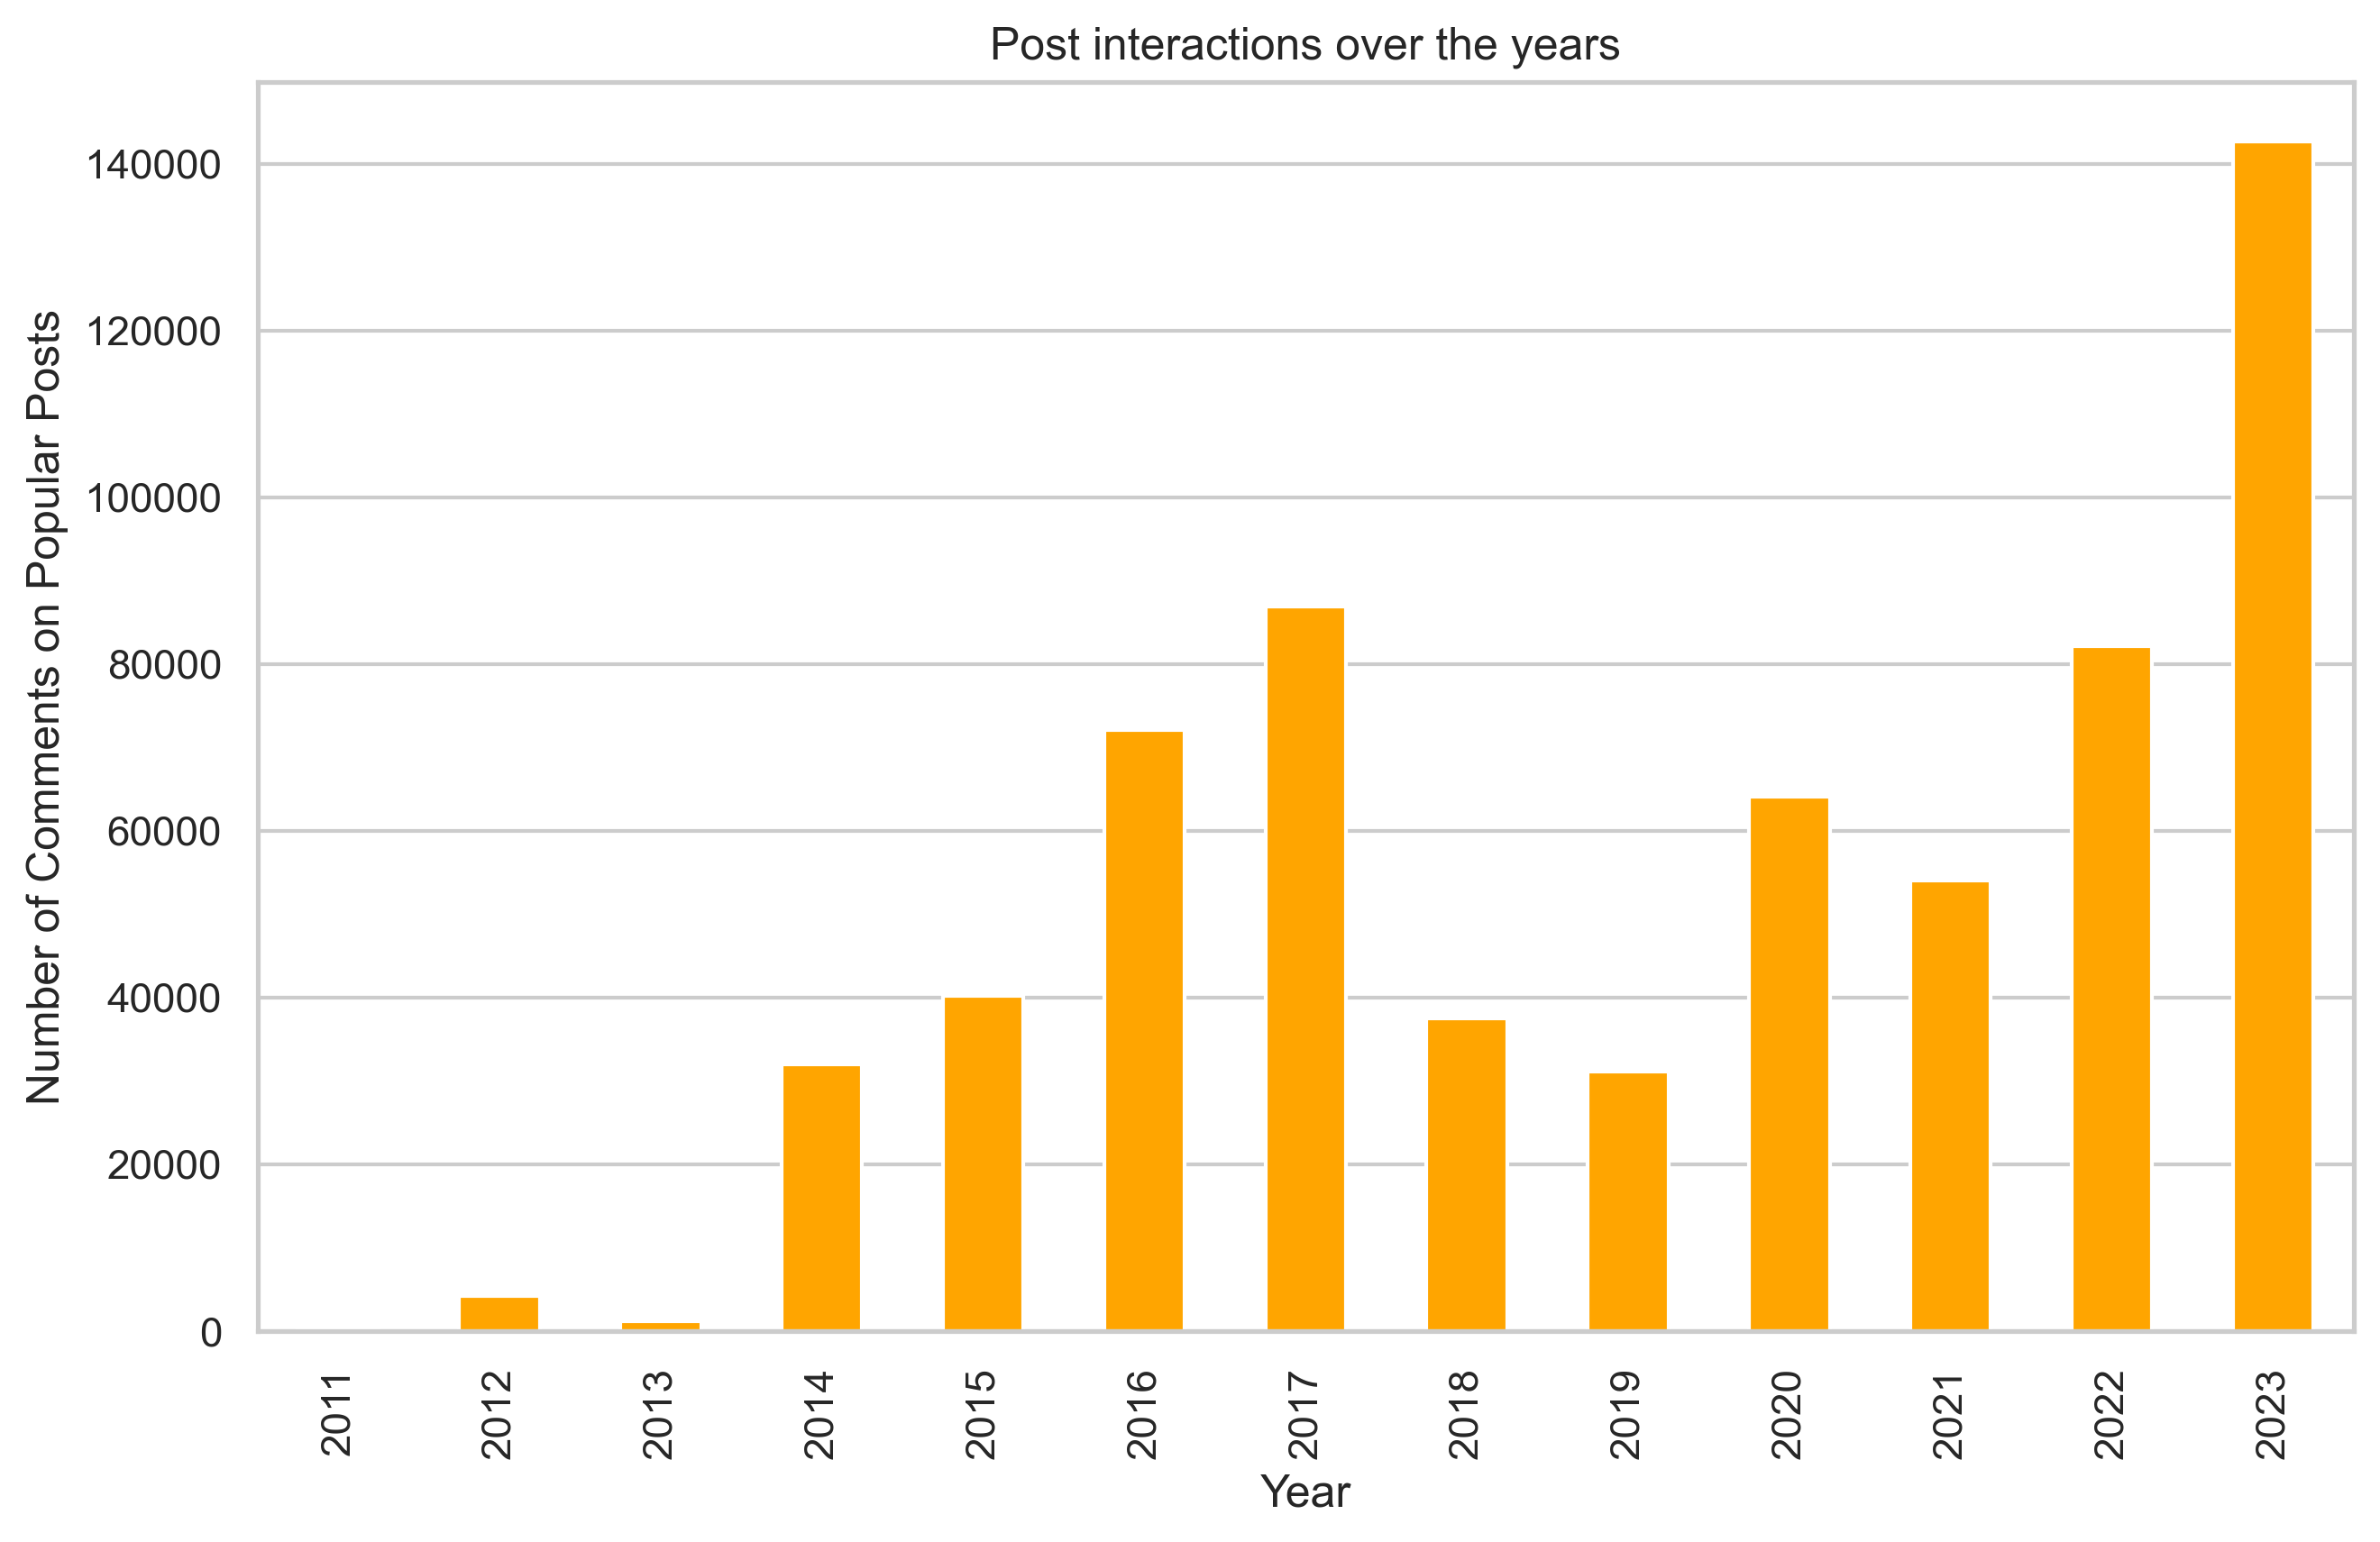

In [849]:
comments_per_year = df.groupby('Year')['Comments'].sum()
plt.figure(figsize=(10, 6))
comments_per_year.plot(kind='bar', color='Orange')
plt.title('Post interactions over the years')
plt.xlabel('Year')
plt.ylabel('Number of Comments on Popular Posts')
plt.grid(axis='x')
plt.show()

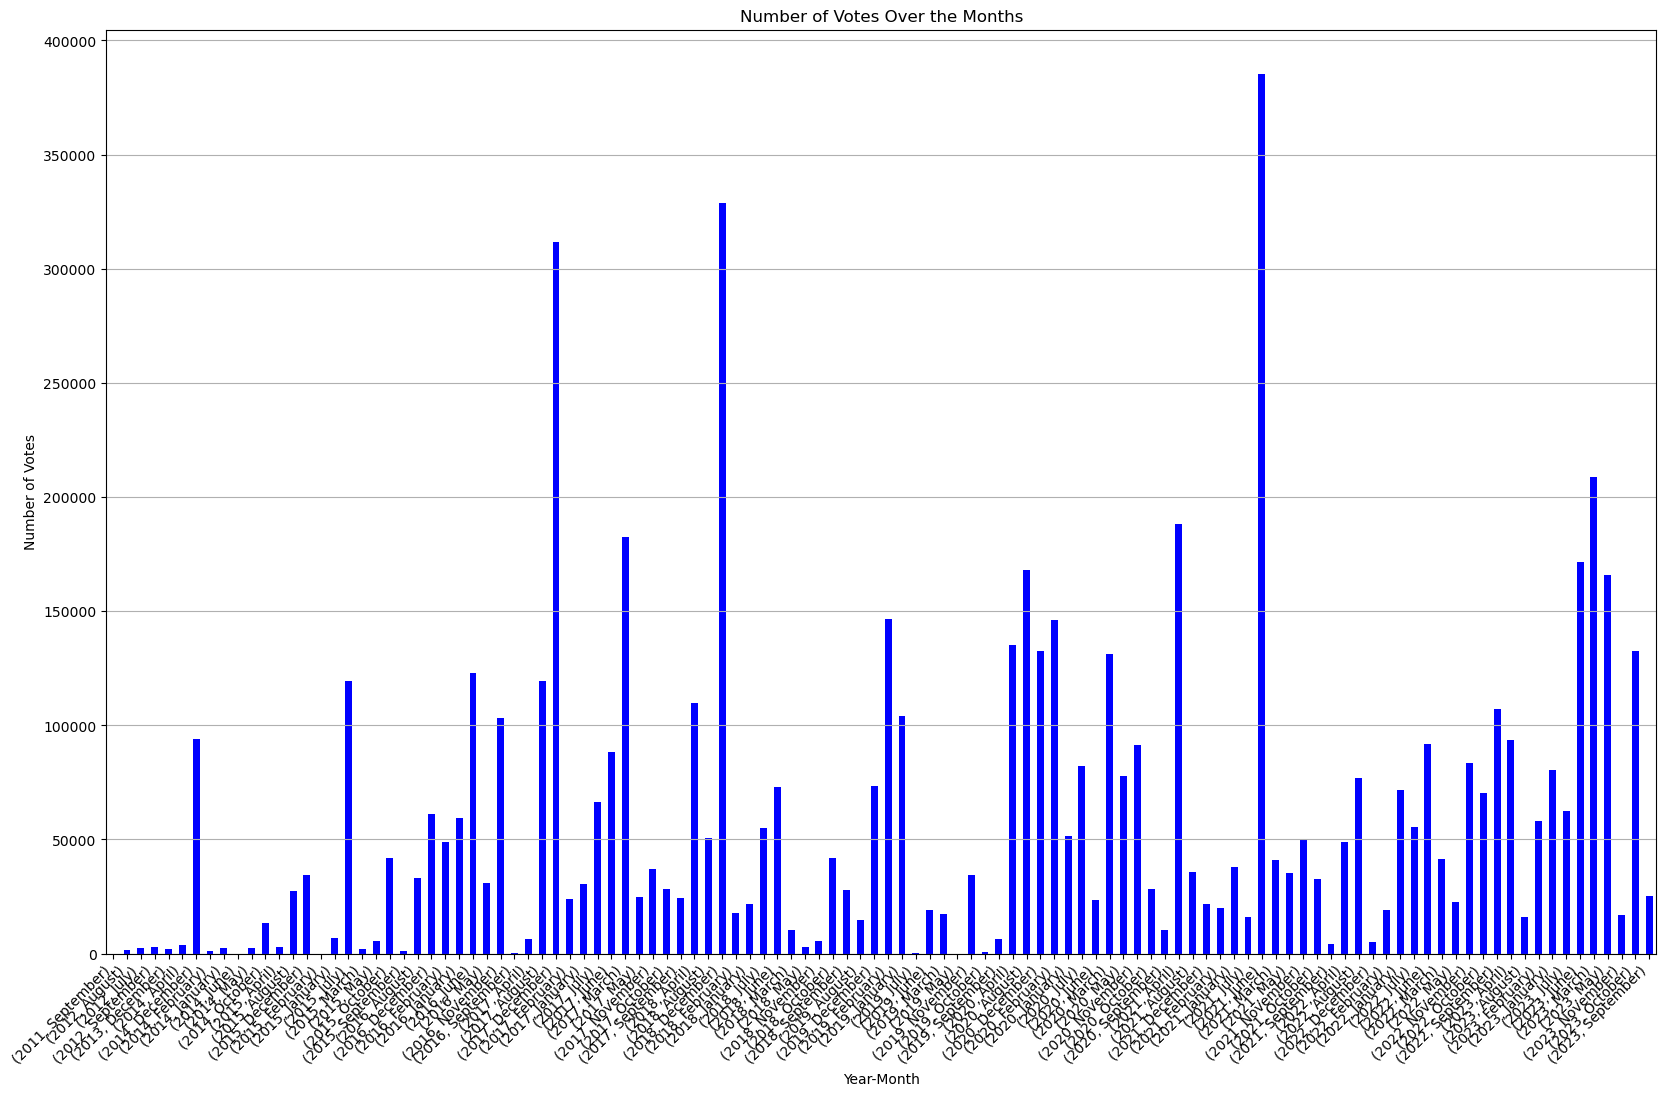

In [807]:
# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Group by year and month, and sum the votes
votes_per_month = df.groupby(['Year', 'Month'])['Votes'].sum()

# Plotting
plt.figure(figsize=(20, 12))
votes_per_month.plot(kind='bar', color='b')
plt.title('Number of Votes Over the Months')
plt.xlabel('Year-Month')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

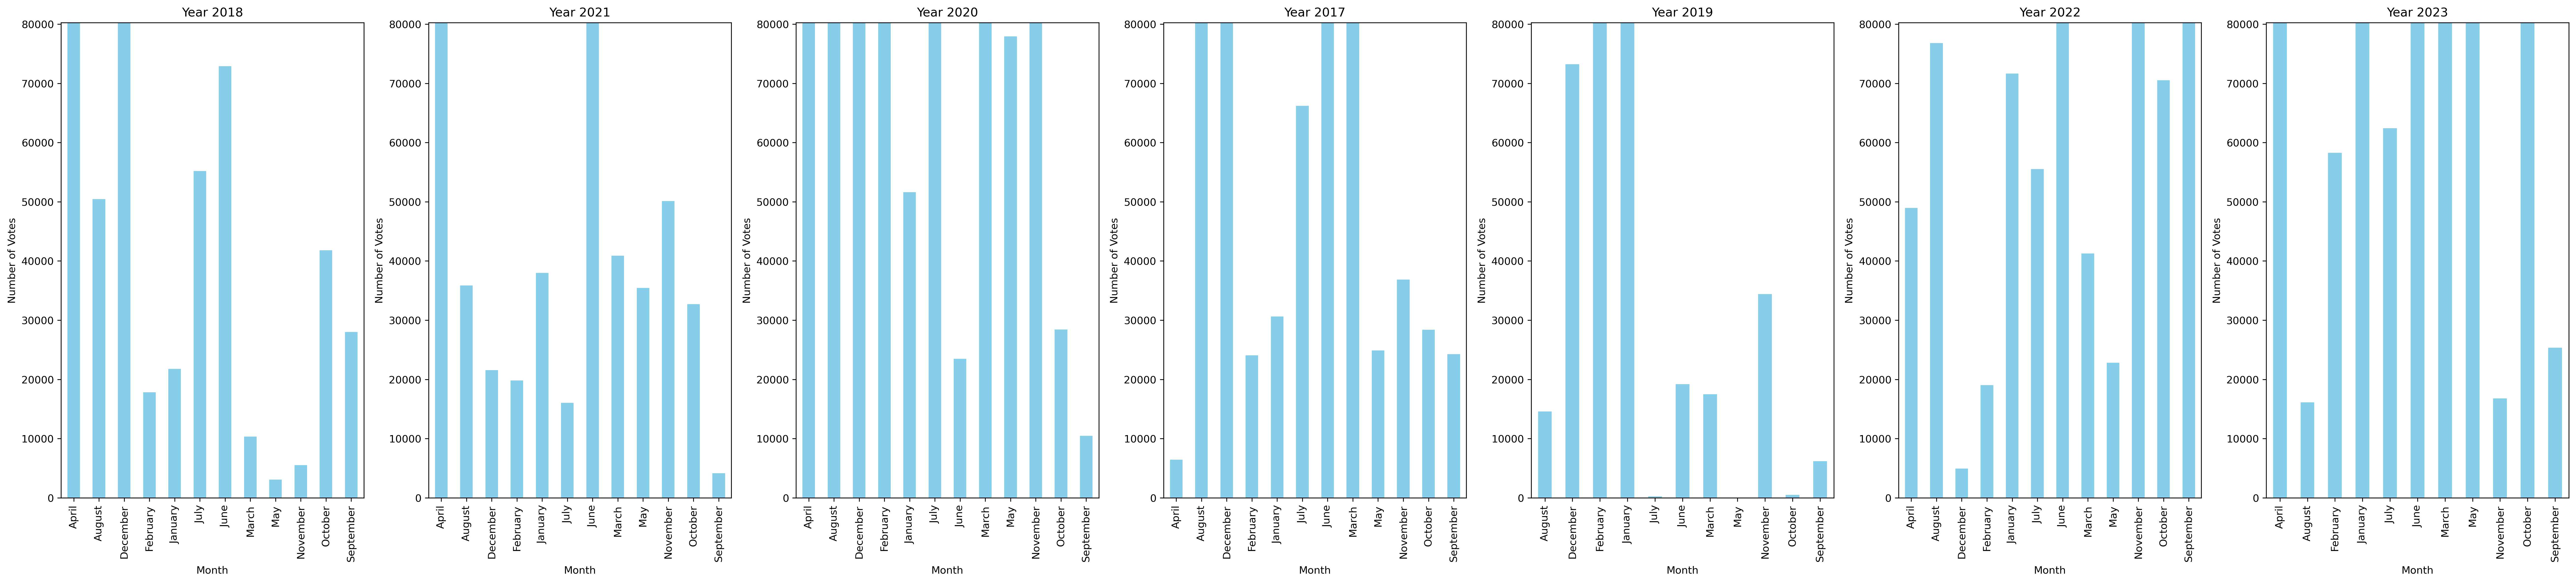

In [821]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Filter data for the years 2017 to 2023
filtered_df = df[df['Year'].between(2017, 2023)]

# Create subplots for each year arranged next to each other
fig, axes = plt.subplots(nrows=1, ncols=len(filtered_df['Year'].unique()), figsize=(5 * len(filtered_df['Year'].unique()), 8))

# Set a common y-axis range for all subplots
y_min = filtered_df['Votes'].min()
y_max = filtered_df['Votes'].max()

# Iterate through each year and create a bar plot
for i, year in enumerate(filtered_df['Year'].unique()):
    year_data = filtered_df[filtered_df['Year'] == year]
    year_data.groupby('Month')['Votes'].sum().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Year {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Votes')
    axes[i].set_ylim(y_min, y_max)  # Set the common y-axis range

plt.tight_layout()
plt.show()

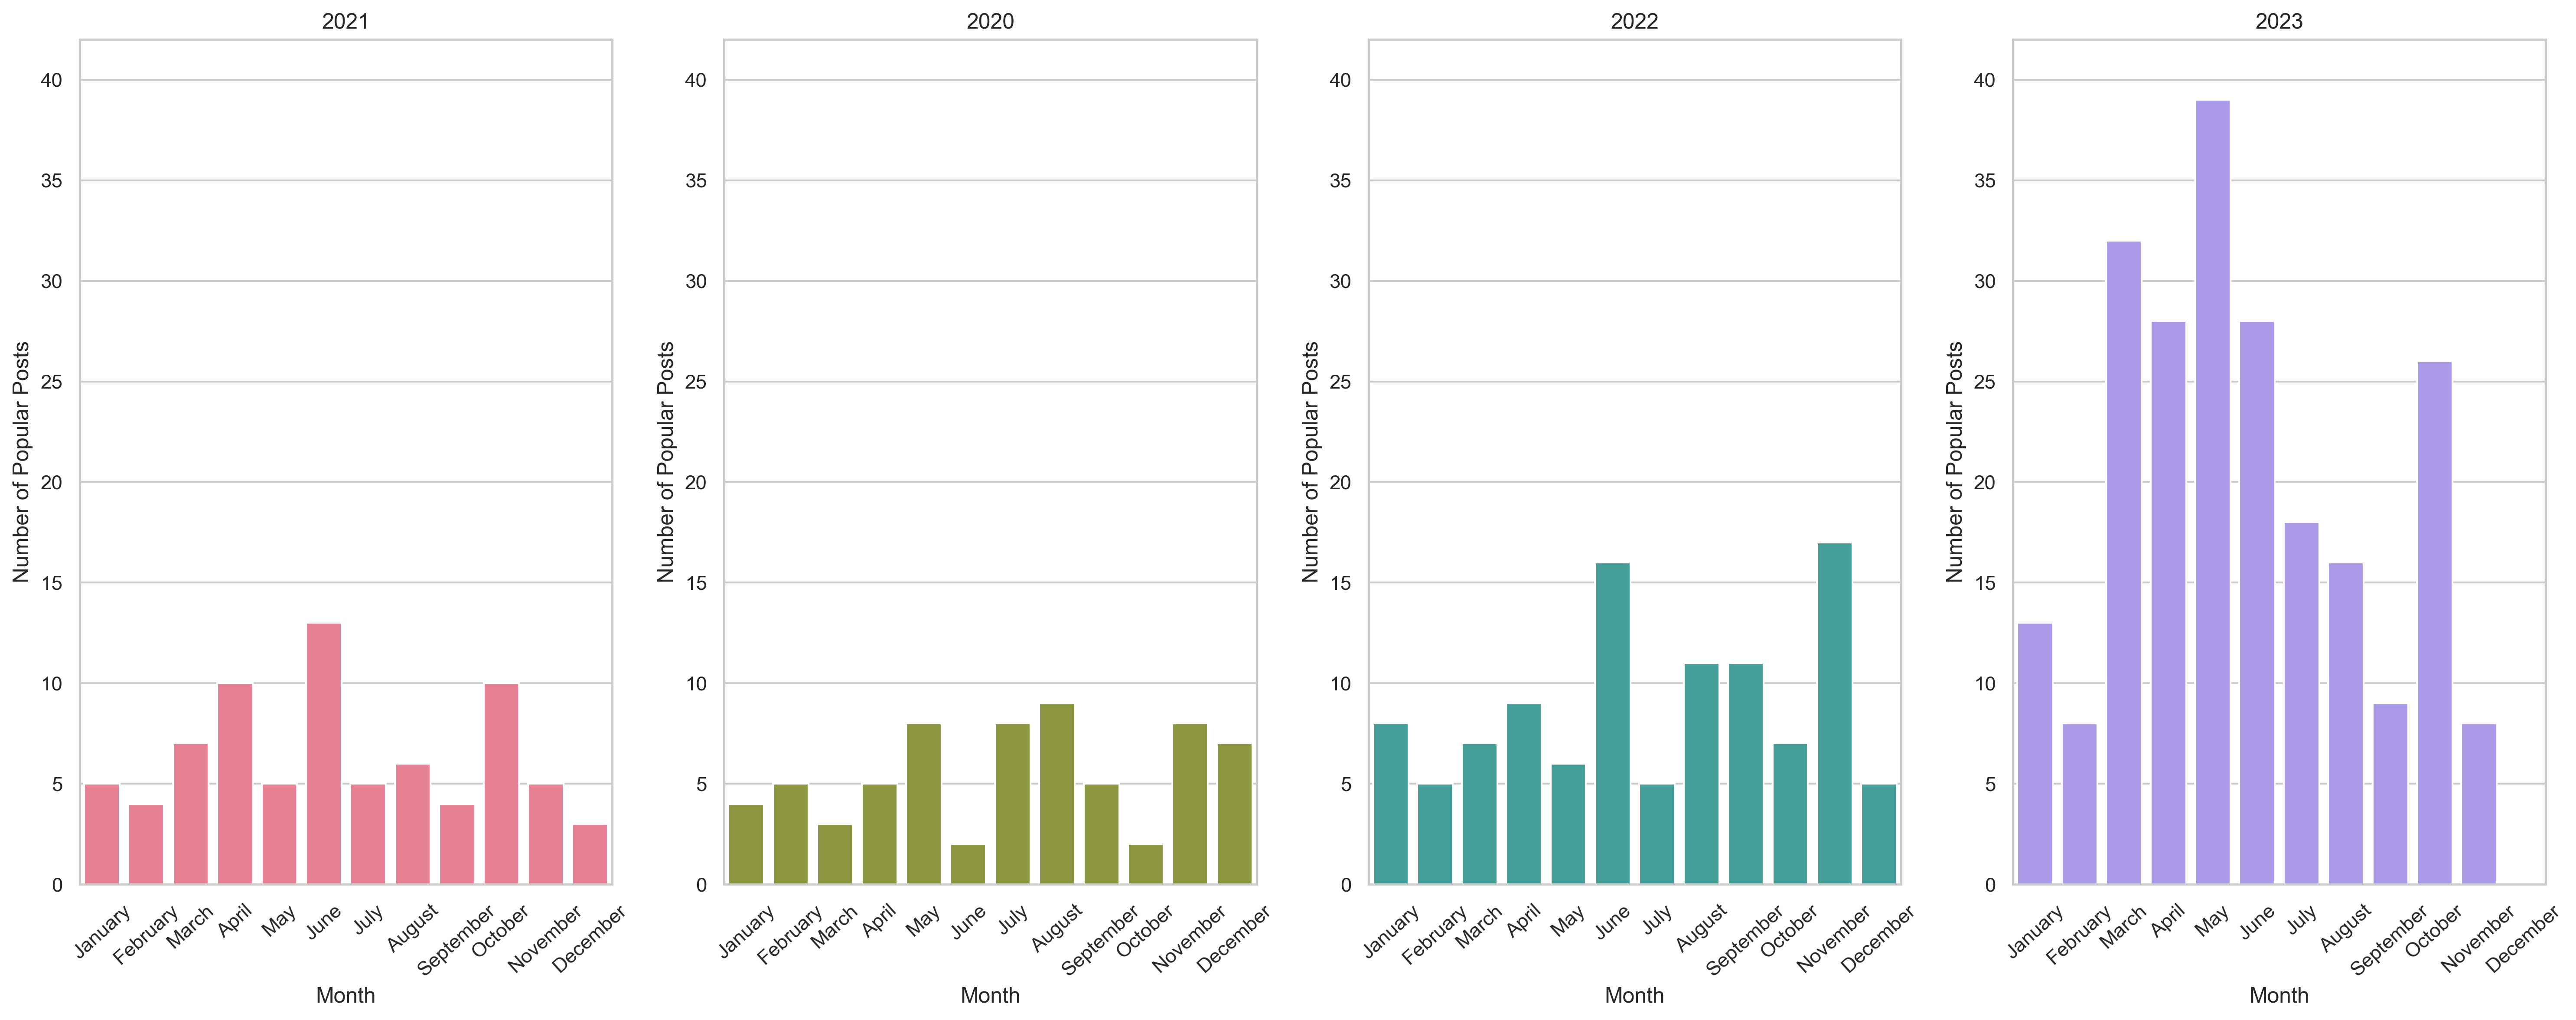

In [844]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'Month' to categorical with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Filter data for the years 2017 to 2023
filtered_df = df[df['Year'].between(2020, 2023)]

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots for each year arranged next to each other
fig, axes = plt.subplots(nrows=1, ncols=len(filtered_df['Year'].unique()), figsize=(5 * len(filtered_df['Year'].unique()), 8))

# Define a color palette for each year
palette = sns.color_palette("husl", len(filtered_df['Year'].unique()))

# Set a common y-axis range for all subplots
y_min = 0
y_max = filtered_df.groupby(['Year', 'Month']).size().max()

# Iterate through each year and create a bar plot with colored bars
for i, year in enumerate(filtered_df['Year'].unique()):
    year_data = filtered_df[filtered_df['Year'] == year]
    sns.countplot(x='Month', data=year_data, ax=axes[i], palette=[palette[i]])
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Popular Posts')
    axes[i].set_ylim(y_min, y_max+3)  # Set the common y-axis range
    axes[i].tick_params(axis='x', labelrotation=42)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


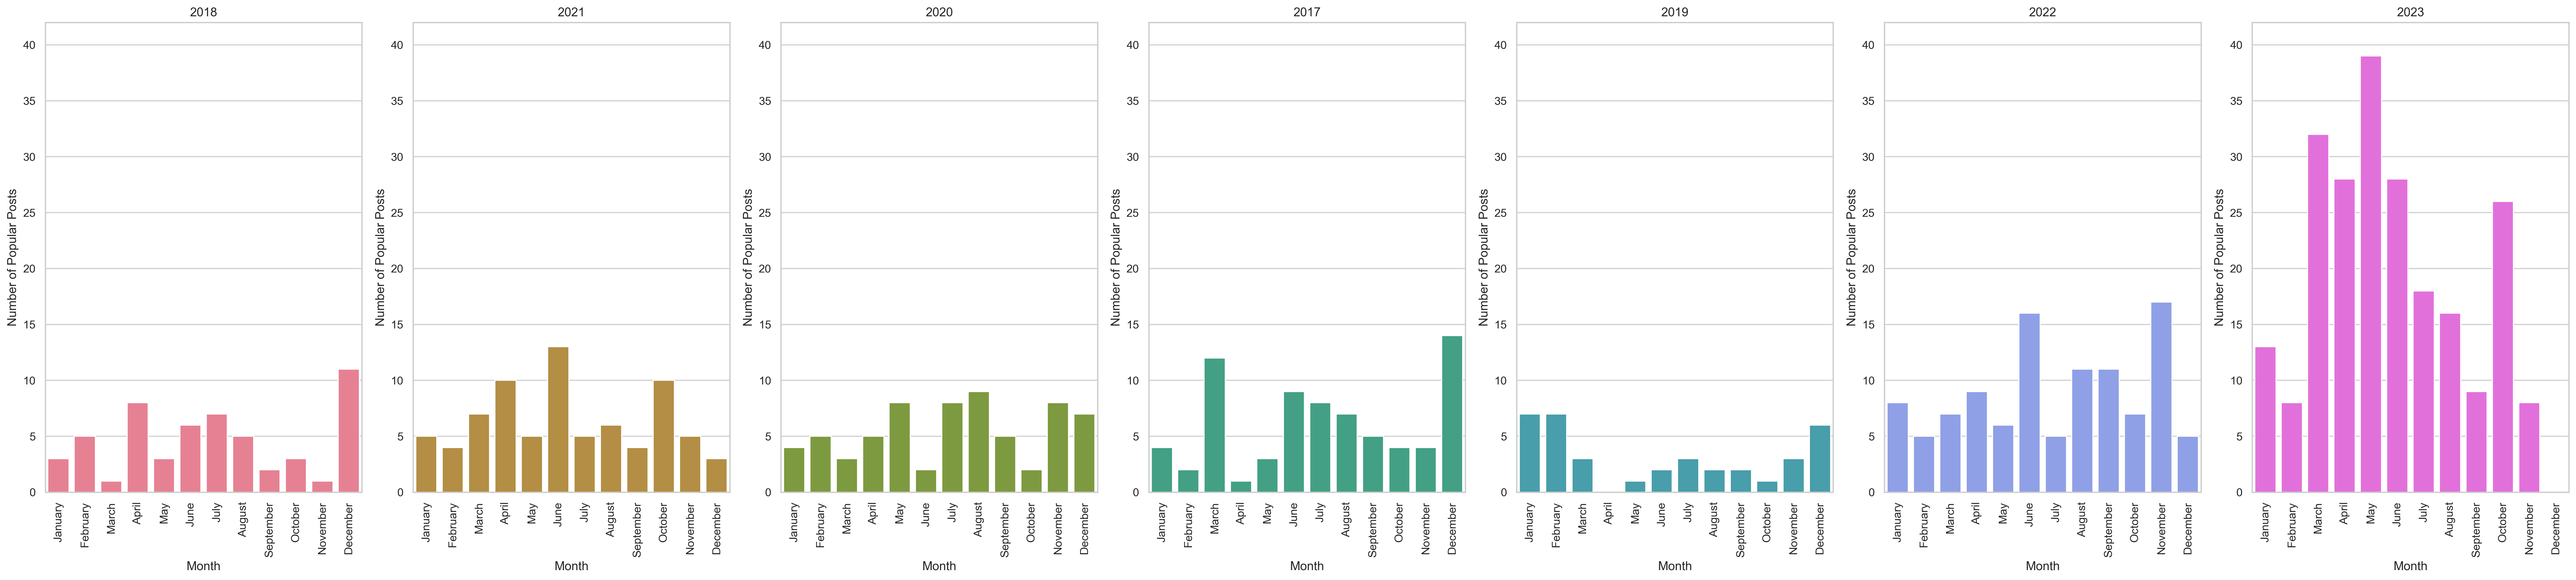

In [845]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert 'Month' to categorical with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Filter data for the years 2017 to 2023
filtered_df = df[df['Year'].between(2017, 2023)]

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots for each year arranged next to each other
fig, axes = plt.subplots(nrows=1, ncols=len(filtered_df['Year'].unique()), figsize=(5 * len(filtered_df['Year'].unique()), 8))

# Define a color palette for each year
palette = sns.color_palette("husl", len(filtered_df['Year'].unique()))

# Set a common y-axis range for all subplots
y_min = 0
y_max = filtered_df.groupby(['Year', 'Month']).size().max()

# Iterate through each year and create a bar plot with colored bars
for i, year in enumerate(filtered_df['Year'].unique()):
    year_data = filtered_df[filtered_df['Year'] == year]
    sns.countplot(x='Month', data=year_data, ax=axes[i], palette=[palette[i]])
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Popular Posts')
    axes[i].set_ylim(y_min, y_max+3)  # Set the common y-axis range
    axes[i].tick_params(axis='x', labelrotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()